<a href="https://colab.research.google.com/github/nhjung-phd/TimeSeriesAnalysis/blob/main/notebooks/30_%E2%80%8BImpulse_Response_Function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

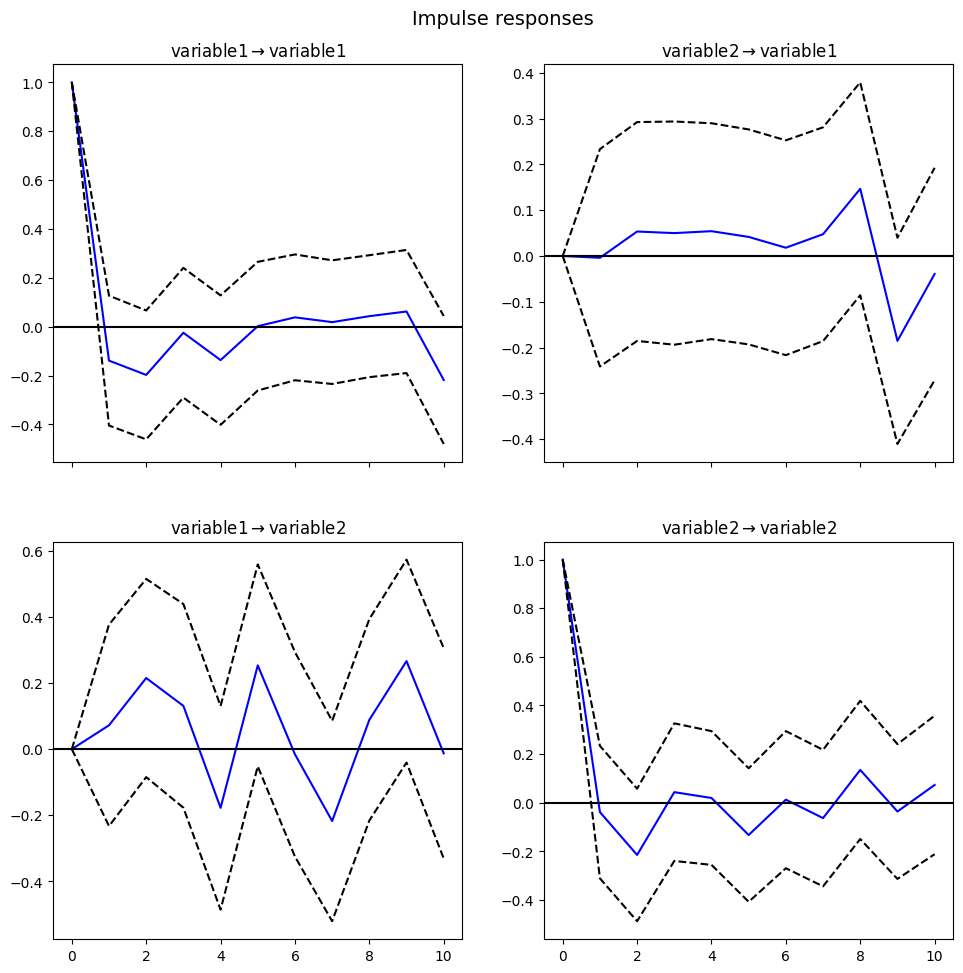

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR

# 예제 데이터 생성
np.random.seed(42)
dates = pd.date_range(start='2020-01-01', periods=100, freq='ME')
data = np.random.randn(100, 2)
df = pd.DataFrame(data, index=dates, columns=['variable1', 'variable2'])

# VAR 모델 적합
model = VAR(df)
results = model.fit(maxlags=15)

# IRF 분석
irf = results.irf(10)
irf.plot(orth=False)
plt.show()


​경제학에서 **양(+)의 충격(Positive Shock)**과 **음(-)의 충격(Negative Shock)**은 경제 시스템에 예상치 못한 외부 요인이 미치는 영향을 설명하는 데 사용됩니다.​

양의 충격(Positive Shock): 이는 경제에 긍정적인 영향을 미치는 예상치 못한 사건을 의미합니다. 예를 들어, 기술 혁신으로 생산성이 향상되거나 정부 지출이 갑자기 증가하는 경우 등이 이에 해당합니다. 이러한 충격은 총수요나 총공급을 증가시켜 경제 성장을 촉진할 수 있습니다.​

음의 충격(Negative Shock): 반대로, 경제에 부정적인 영향을 미치는 예상치 못한 사건을 의미합니다. 예를 들어, 자연재해로 인한 생산 시설의 파괴, 원자재 가격의 급등, 금융 위기 등이 이에 해당합니다. 이러한 충격은 총수요나 총공급을 감소시켜 경기 침체를 유발할 수 있습니다.

<ipython-input-2-693600e3e882>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='2020-01-01', periods=100, freq='M')


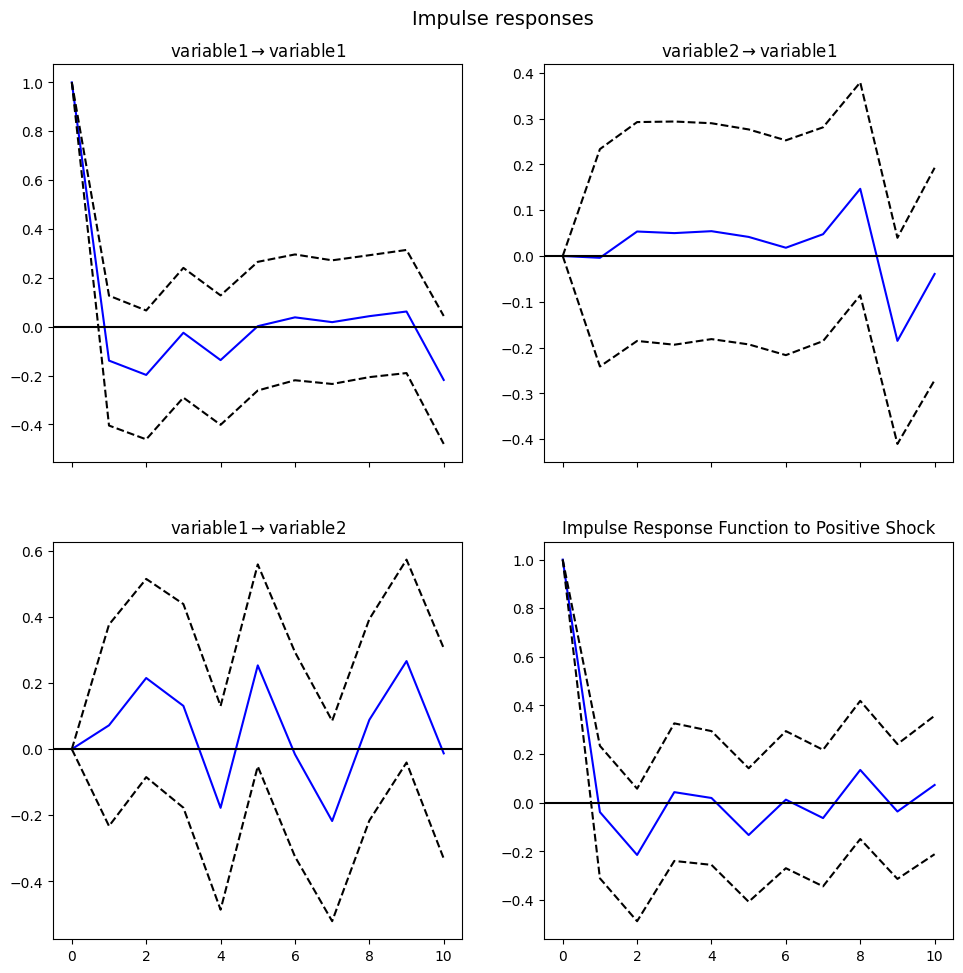

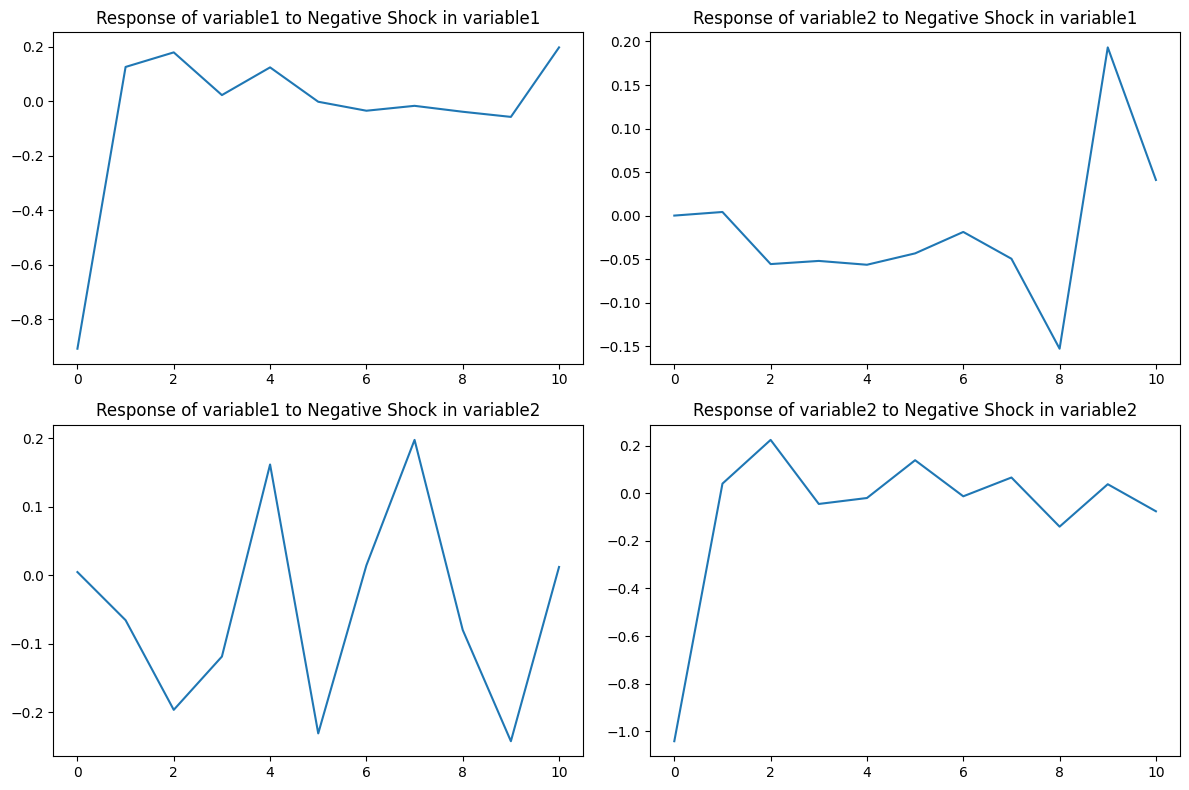

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR

# 예제 데이터 생성
np.random.seed(42)
dates = pd.date_range(start='2020-01-01', periods=100, freq='M')
data = np.random.randn(100, 2)
df = pd.DataFrame(data, index=dates, columns=['variable1', 'variable2'])

# VAR 모델 적합
model = VAR(df)
results = model.fit(maxlags=15)

# 양의 충격에 대한 IRF 분석
irf = results.irf(10)
irf.plot(orth=False)
plt.title("Impulse Response Function to Positive Shock")
plt.show()

# 음의 충격에 대한 IRF 분석
# 양의 충격에 대한 IRF 결과의 부호를 반대로 변경하여 음의 충격에 대한 반응을 시각화
irf_negative = results.irf(10)
fig, axes = plt.subplots(nrows=irf.orth_irfs.shape[1], ncols=irf.orth_irfs.shape[2], figsize=(12, 8))
for i in range(irf.orth_irfs.shape[1]):
    for j in range(irf.orth_irfs.shape[2]):
        axes[i, j].plot(-irf.orth_irfs[:, i, j])
        axes[i, j].set_title(f'Response of {df.columns[j]} to Negative Shock in {df.columns[i]}')
plt.tight_layout()
plt.show()
